In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Здесь лежит csv-файл (GitHub не пускал из-за веса файла)
https://disk.yandex.ru/d/6d82xZE5IN0tKA

In [62]:
df = pd.read_csv('obj_near_atm2.csv')

В рамках проведенного разведочного анализа был сформирован датасет, состоящий из пар (банкомат - объект). Данный датасет был создан путем соединения таблиц atms (перечень банкоматов), а также objects (перечень объектов) таким образом, что пара банкомат - объект формировалась только в том случае, если объект располагается в радиусе 500 м от банкомата. Кроме того, в рассмотрение попали только объекты и банкомата, которые распооложены в Москве, а также в крупнейших населенных пунктах (численность населения > 40 000 чел) Московской области. 

**Описание признаков**

- `id_atm` — уникальный номер банкомата
- `address_atm` — адрес банкомата
- `lat_atm` — широта (банкомат)
- `lon_atm` — долгота (банкомат)
- `id_obj` — уникальный номер объекта (уникальный только в рамках данной группы объектов)
- `lat_obj` — широта (объект)
- `lon_obj` — долгота (объект)
- `region_obj` — регион размещения объекта
- `type_obj` — тип объекта

In [63]:
df = df[ df['type_obj'] != 'amenity-atm']
df.shape

(447735, 9)

In [64]:
df.head()

,id_atm,address_atm,lat_atm,lon_atm,id_obj,lat_obj,lon_obj,region_obj,type_obj
0,0,"Московская обл, г Сергиев Посад, ул Кооператив...",56.301963,38.135828,4898752021,56.309765,38.135261,Московская область,amenity-cafe
1,0,"Московская обл, г Сергиев Посад, ул Кооператив...",56.301963,38.135828,6753093123,56.302012,38.134818,Московская область,amenity-fast_food
2,0,"Московская обл, г Сергиев Посад, ул Кооператив...",56.301963,38.135828,1969442020,56.304456,38.134385,Московская область,amenity-pharmacy
3,0,"Московская обл, г Сергиев Посад, ул Кооператив...",56.301963,38.135828,5537449422,56.302564,38.136262,Московская область,amenity-pharmacy
4,0,"Московская обл, г Сергиев Посад, ул Кооператив...",56.301963,38.135828,6462575040,56.302937,38.135861,Московская область,amenity-cafe


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447735 entries, 0 to 481083
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id_atm       447735 non-null  int64  
 1   address_atm  447735 non-null  object 
 2   lat_atm      447735 non-null  float64
 3   lon_atm      447735 non-null  float64
 4   id_obj       447735 non-null  int64  
 5   lat_obj      447735 non-null  float64
 6   lon_obj      447735 non-null  float64
 7   region_obj   447735 non-null  object 
 8   type_obj     447735 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 34.2+ MB


In [66]:
df.describe(include='all')

,id_atm,address_atm,lat_atm,lon_atm,id_obj,lat_obj,lon_obj,region_obj,type_obj
count,447735.000000,447735,447735.000000,447735.000000,4.477350e+05,447735.000000,447735.000000,447735,447735
unique,NaN,4890,NaN,NaN,NaN,NaN,NaN,2,28
top,NaN,"г Москва, наб Пресненская, д 2",NaN,NaN,NaN,NaN,NaN,Москва,highway-bus_stop
freq,NaN,1944,NaN,NaN,NaN,NaN,NaN,410806,84555
mean,3566.847419,NaN,55.747233,37.624792,5.027793e+09,55.747282,37.624770,NaN,NaN
std,1829.136999,NaN,0.098322,0.155899,3.222842e+09,0.098343,0.155916,NaN,NaN
min,0.000000,NaN,54.897925,36.688198,2.699967e+07,54.898702,36.684772,NaN,NaN
25%,2013.000000,NaN,55.726970,37.566446,2.287177e+09,55.727485,37.566840,NaN,NaN
50%,3518.000000,NaN,55.757052,37.616402,4.611601e+09,55.757507,37.616389,NaN,NaN
75%,5123.000000,NaN,55.780127,37.656659,7.299186e+09,55.780408,37.656989,NaN,NaN


In [67]:
df.isna().sum()

id_atm         0
address_atm    0
lat_atm        0
lon_atm        0
id_obj         0
lat_obj        0
lon_obj        0
region_obj     0
type_obj       0
dtype: int64

Спецификой датасета является отсутствие пропусков, а также небольшое количество числовых признаков, а те признаки, тип данных которых можно отнести к int/float, являются или id-объектов, или координатами. Кроме того, на данный момент еще происходит формирование методики по определению таргета (индекса популярности геолокации банкомата), поэтому данный признак отсутствует в датасете. 

In [68]:
df['id_atm'].nunique()

6650

Как можно видеть в табличной форме ниже, разброс по количеству объектов, которые находятся в 500-метровом радиусе банкомата, существенный. 

In [70]:
df['id_atm'].value_counts()

3043    309
5271    301
6528    299
4381    298
2511    294
       ... 
1802      1
5839      1
2358      1
5317      1
3013      1
Name: id_atm, Length: 6650, dtype: int64

In [71]:
distribution = df.groupby('id_atm')['id_obj'].count()

In [72]:
distribution 

id_atm
0        45
1        62
2        56
3        31
4        24
       ... 
6666     85
6667     29
6668    127
6669    146
6670     64
Name: id_obj, Length: 6650, dtype: int64

Как видно из распределения ниже, большая часть банкоматов имеет в своей буфферной зоне (R = 500 м) порядка 400-500 объектов. 

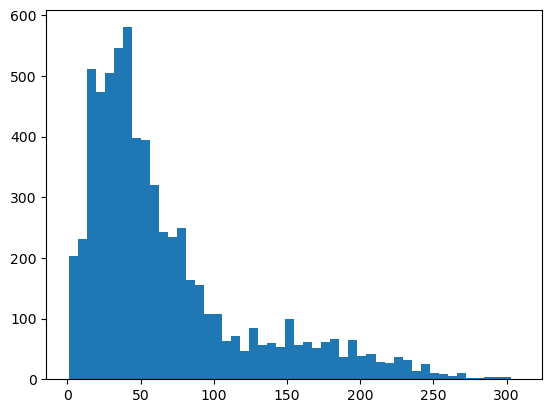

In [73]:
plt.hist(distribution, bins=50)
plt.show()

In [74]:
# в среднем на каждый банкомат приходится 67 объектов в заданном радиусе
df.groupby('id_atm')['id_atm'].count().mean().round()

67.0

In [75]:
distribution_msk = df[df['region_obj'] == 'Москва'].groupby('id_atm')['id_obj'].count()

Распределение значений только по Москве сильно похоже на общее распределение, что свидетельствует о том, что наибольший вес имеют данные по Москве. 

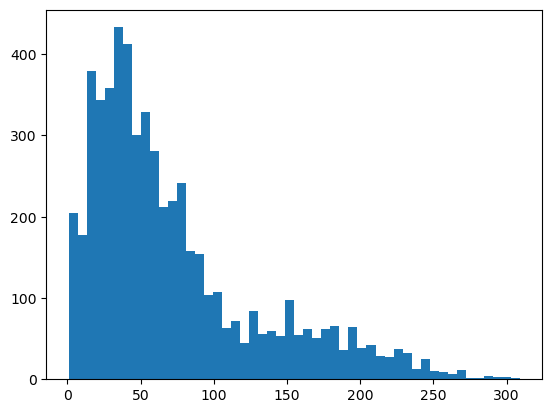

In [76]:
plt.hist(distribution_msk, bins=50)
plt.show()

In [77]:
# Среднее кол-во объектов вокруг банкомата
distribution_msk.mean()

72.90257320319432

In [78]:
distribution_mo = df[df['region_obj'] == 'Московская область'].groupby('id_atm')['id_obj'].count()

Количество банкоматов, как и плотность населения в МО существенно уступает значениям по Москве, что логично. Из чего также свидетельствует, что количество объектов, которые попали в радиус одного банкомата значительно меньше по сравнению с Москвой. Что также косвенно может свидительствовать о том, что средняя дистанция, которую необходимо преодолеть для нахождения банкомата в Москве, меньше по сравнению с крупными городами МО.

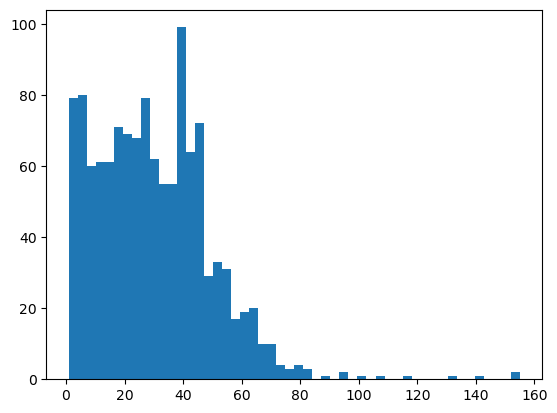

In [96]:
plt.hist(distribution_mo, bins=0)
plt.show()

In [80]:
# Среднее кол-во объектов вокруг банкомата
distribution_mo.mean()

30.072475570032573

In [81]:
# типы объектов
df['type_obj'].unique()

array(['amenity-cafe', 'amenity-fast_food', 'amenity-pharmacy',
       'amenity-restaurant', 'shop-supermarket', 'highway-bus_stop',
       'tourism-hotel', 'amenity-police', 'railway-station',
       'amenity-cinema', 'amenity-bank', 'amenity-clinic',
       'amenity-university', 'shop-department_store', 'amenity-fuel',
       'amenity-theatre', 'amenity-food_court', 'amenity-courthouse',
       'amenity-hospital', 'amenity-college', 'office-yes', 'subway-yes',
       'amenity-bureau_de_change', 'amenity-nightclub', 'shop-general',
       'shop-mall', 'leisure-stadium', 'building-public'], dtype=object)

In [82]:
# количество уникальных объектов по каждой группе объектов
group_obj = df.groupby(['type_obj', 'id_obj'], as_index=False)\
              .count()\
              .groupby('type_obj')\
              .count()['id_obj']\
              .sort_values(ascending=False)
group_obj

type_obj
highway-bus_stop            12050
amenity-pharmacy             5264
amenity-cafe                 4855
amenity-fast_food            4290
shop-supermarket             3951
amenity-restaurant           2760
amenity-bank                 2544
amenity-clinic               1190
subway-yes                    758
tourism-hotel                 701
amenity-police                561
amenity-fuel                  554
railway-station               340
amenity-theatre               217
amenity-cinema                147
amenity-bureau_de_change      127
amenity-courthouse            120
amenity-nightclub             113
amenity-university            105
office-yes                     80
amenity-hospital               75
shop-department_store          72
amenity-food_court             68
amenity-college                46
shop-mall                      40
shop-general                    9
building-public                 2
leisure-stadium                 1
Name: id_obj, dtype: int64

In [83]:
objs = df.groupby('type_obj').agg({'id_atm':'count'}).sort_values(by='id_atm', ascending=False)
objs

,id_atm
type_obj,
highway-bus_stop,84555
amenity-cafe,70801
amenity-fast_food,56632
amenity-restaurant,52466
amenity-pharmacy,47843
amenity-bank,36527
shop-supermarket,27531
amenity-clinic,17204
subway-yes,12252


In [84]:
objs['num_objs'] = group_obj

In [89]:
objs['mean_num'] = (objs['id_atm'] / objs['num_objs']).round()

К объектам, рядом с которыми размещено наибольшее количество банкоматов (в среднем), можно отнести пункты обмена валюты, фуд корт, театры, рестораны, ночные клубы, стадионы, а также отели. Большая часть данных объектов за исключением обменников валюты тяготеют к центру города, где плотная застройка, а также высотная плотность населения, что и вынуждает банки размещать большое количество банкоматов именно в центре города. 

In [93]:
# Сколько в среднем банкоматов располагается в непосредственной близости от банкомата
objs = objs.sort_values(by='mean_num', ascending=False)
objs

,id_atm,num_objs,mean_num
type_obj,,,
amenity-bureau_de_change,2839,127,22.0
amenity-food_court,1327,68,20.0
amenity-theatre,4084,217,19.0
amenity-restaurant,52466,2760,19.0
amenity-nightclub,2158,113,19.0
leisure-stadium,18,1,18.0
tourism-hotel,12078,701,17.0
subway-yes,12252,758,16.0
amenity-cafe,70801,4855,15.0


In [100]:
obj_test = df.groupby(['type_obj', 'id_obj']).count().sort_values(by='id_atm', ascending=False)
obj_test

id_atm  address_atm  lat_atm  lon_atm  lat_obj  \
type_obj         id_obj                                                        
highway-bus_stop 1343288184      125          125      125      125      125   
                 10788833833     125          125      125      125      125   
amenity-pharmacy 1343175367      125          125      125      125      125   
highway-bus_stop 1343288168      125          125      125      125      125   
                 1343288169      125          125      125      125      125   
...                              ...          ...      ...      ...      ...   
amenity-bank     10050535923       1            1        1        1        1   
shop-supermarket 4866958002        1            1        1        1        1   
                 4871148205        1            1        1        1        1   
                 4876714021        1            1        1        1        1   
amenity-fuel     485987163         1            1        1        1        1   

                              lon_obj  region_obj  
type_obj         id_obj                            
highway-bus_stop 1343288184       125         125  
                 10788833833      125         125  
amenity-pharmacy 1343175367       125         125  
highway-bus_stop 1343288168       125         125  
                 1343288169       125         125  
...                               ...         ...  
amenity-bank     10050535923        1           1  
shop-supermarket 4866958002         1           1  
                 4871148205         1           1  
                 4876714021         1           1  
amenity-fuel     485987163          1           1  

[41040 rows x 7 columns]

1. Как одна из идей по разработке индекса популярности геолокации для размещения банкомата выступает - присвоение условных весов для каждого объекта (т.е. насколько каждый объект способствует тому, чтобы здесь был размещен банкомат). Веса могут быть присвоены исходя из данных (objs['mean']), который демонстрирует сколько в среднем банкоматов расположено в 500-метровой зоне от объекта. 
2. Также стоит отметить, что география исследования включает в себя не только Москву, но также и Московскую область. При этом, как уже отмечалось, данные по Московской области отличаются сильной разряженностью на фоне данных Москвы, где плотность объектов совсем на другом уровне, из чего можно заключить, что последующий расчет и разработка индекса потребует индивидуальный подход к населенным пунктам МО, чтобы увеличить точность прогнозной модели. 
3. При этом "кучность" банкоматов особенно в центре Москвы демонстрирует низкий уровень конкуренции между ними, т.е. можно констатировать, что размещение банкомата одного банка не сильно влияет размещению банкомата другого банка с негативной точки зрения. Скорее даже наоборот, судя по координатам, многие банкоматы размещают достаточно близко, некоторые из них, которые расположены, например, в торговом центре, образуют совместную зону для банкоматов, что упрощает ручной перевод денег с одной карты/одногого счета на другой.